0.6600000000000004

1.580999999999995

-0.14

array([[1.00000000e-20, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e-20],
       [9.99985000e-01, 9.99985000e-01, 9.99985000e-01, ...,
        9.99997000e-01, 9.99997000e-01, 9.99997000e-01],
       [9.99946700e-01, 9.99946700e-01, 9.99946700e-01, ...,
        9.99992000e-01, 9.99992000e-01, 9.99992000e-01],
       ...,
       [0.00000000e+00, 3.00191563e-03, 9.12172849e-03, ...,
        9.87231429e-01, 9.87230446e-01, 9.87230446e-01],
       [0.00000000e+00, 3.01512017e-03, 9.16045267e-03, ...,
        9.87139256e-01, 9.87138273e-01, 9.87138273e-01],
       [0.00000000e+00, 3.06793000e-03, 9.32089800e-03, ...,
        1.00442900e+00, 1.00442800e+00, 1.00000000e-20]])

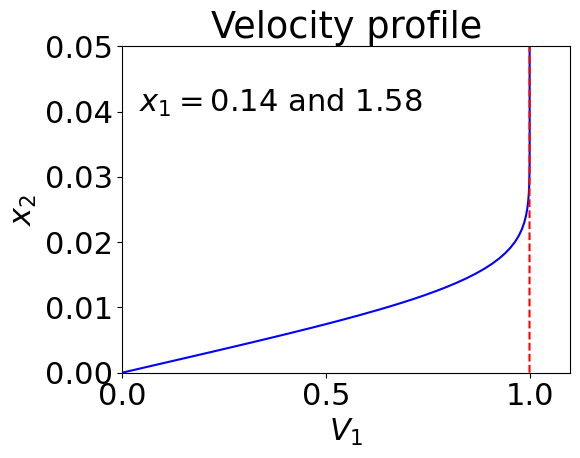

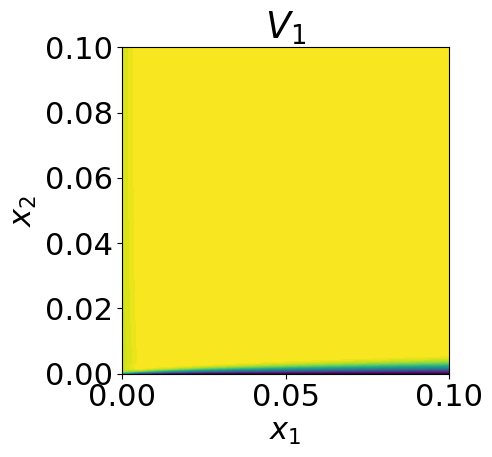

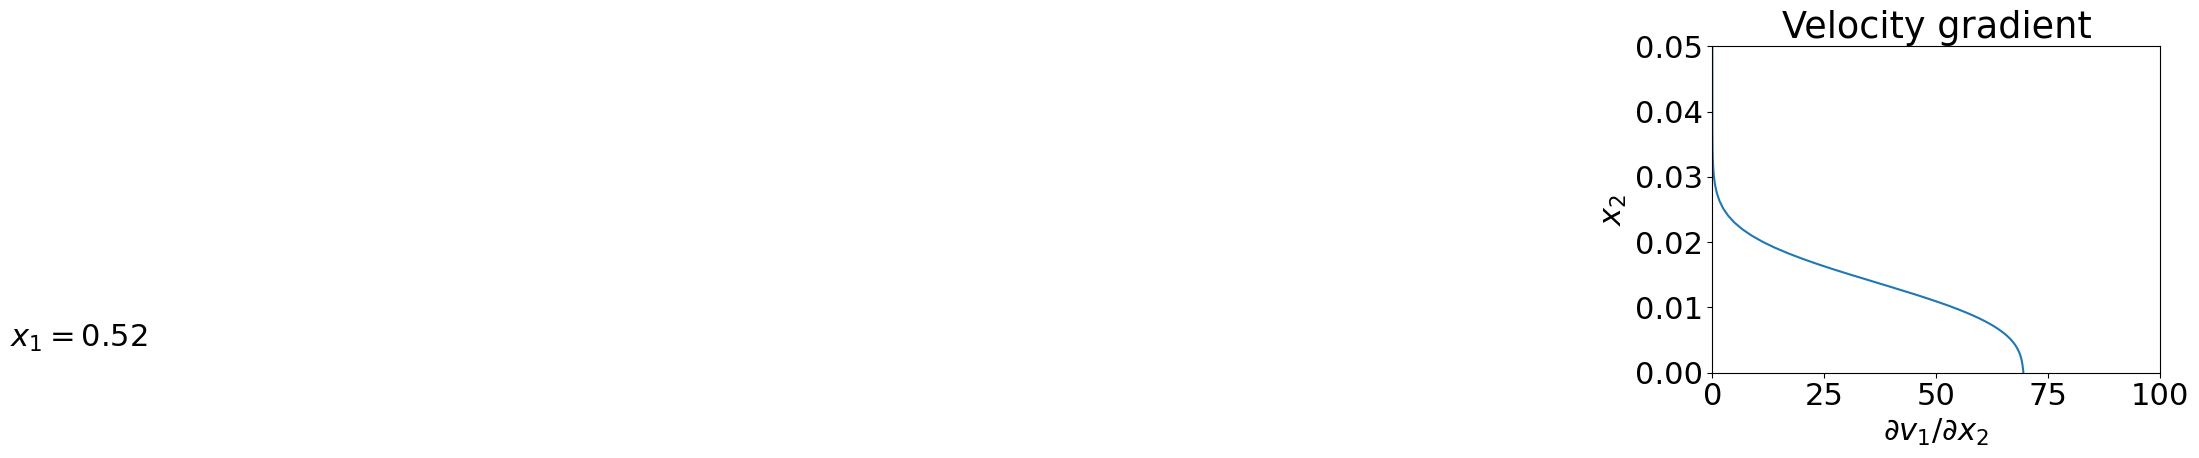

In [1]:
import numpy as np
from boundary_layer import *

a = (v1,(ni,nj))

# Coordinates of the points
display(xc[85])
display(xc[170])
display(xc[5])

# V_1inf, v1 freestream velocity
display(v1_2d)


## E1 Subtask 1

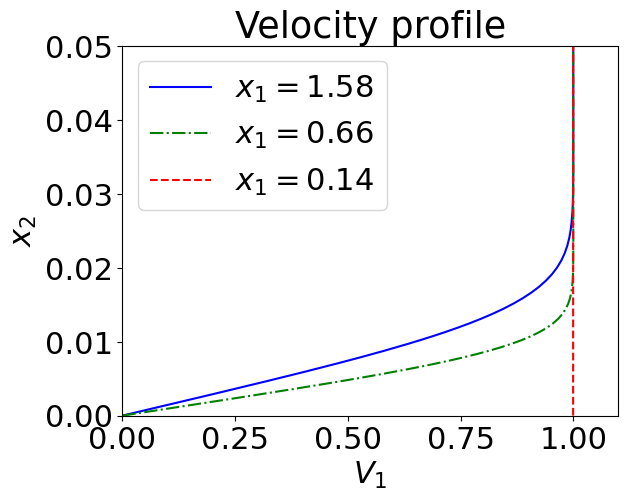

In [2]:
# Substask 1

i=170 # plot the velocity profile for i=170
plt.plot(v1_2d[i,:], x2_2d[i,:], 'b-', label='$x_1=1.58$')

i=85 # plot the velocity profile for i=85
plt.plot(v1_2d[i,:], x2_2d[i,:], 'g-.', label='$x_1=0.66$')

i=5 # plot the velocity profile for i=5
plt.plot(v1_2d[i,:], x2_2d[i,:], 'r--', label='$x_1=0.14$')

plt.title('Velocity profile')
plt.axis([0,1.1,0,0.05])
plt.xlabel('$V_1$') 
plt.ylabel('$x_2$') 

plt.legend(loc='best')
plt.savefig('velprof.png')


## E1 Subtask 2

V1_inf: 0.9896767627558745


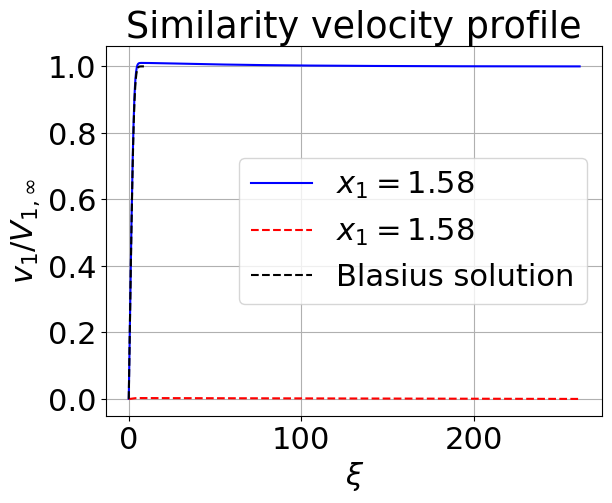

In [3]:
i = 170 # plot the dimensioneless velocity profile for i=170

# Freestream velocity at x1 location
V1_inf = v1_2d[i,-1] 

xi = yp * np.sqrt(V1_inf / (viscos * xc[i]))
v1_norm = v1_2d[i, :] / V1_inf
v2_norm = v2_2d[i, :] / V1_inf

print('V1_inf:', V1_inf)

#print(v2_norm)



# Plot
plt.figure()
plt.plot(xi, v1_norm, 'b-', label=fr'$x_1={xc[i]:.2f}$')
plt.plot(xi, v2_norm, 'r--', label=fr'$x_1={xc[i]:.2f}$')

# Adding Blasius solution for comparison
plt.plot(xi_blas, u_blas, 'k--', label='Blasius solution')

plt.xlabel(r'$\xi$')
plt.ylabel(r'$v_1 / V_{1,\infty}$')
plt.title('Similarity velocity profile')
plt.legend()
plt.grid(True)
plt.show()


## E2

0.027521534496262316
62
0.0307792908723064


/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_3636/973865662.py:11: RuntimeWarning: invalid value encountered in sqrt
  delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)


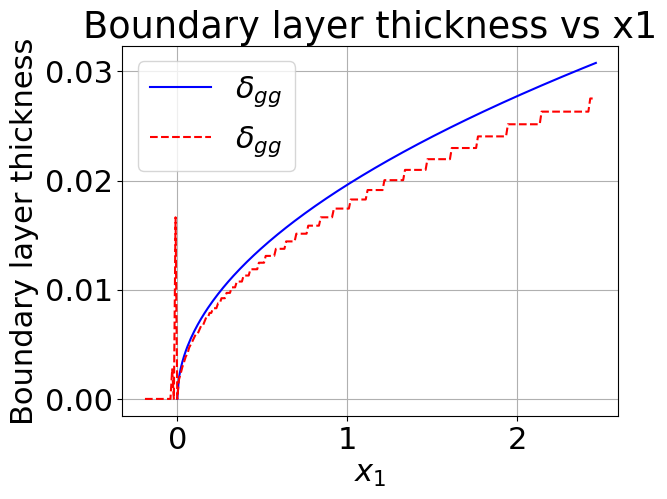

In [50]:


# Need to find x2 at the location where v1 = 0.99*V1_inf
index_gg_test = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
delta_gg_test = x2_2d[i,index_gg_test]
print(delta_gg_test)
print(index_gg_test)

delta_gg = 5 * np.sqrt((viscos * xc[i])/V1_inf)
print(delta_gg)

# Need to now plot delta_gg and delta_gg_blasius as a function of x1
delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)
delta_gg_all = np.zeros_like(xc)

for i in range(len(xc)):
    V1_inf = v1_2d[i,-1]
    index_99 = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
    delta_gg_all[i] = x2_2d[i,index_99]

plt.figure()
plt.plot(xc, delta_gg_blasius, 'b-', label=r'$\delta_{gg}$')
plt.plot(xc, delta_gg_all, 'r--', label=r'$\delta_{gg}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'Boundary layer thickness')
plt.title('Boundary layer thickness vs x1')
plt.legend()
plt.grid(True)
plt.show()

#delta_star = 

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_3636/3979287966.py:46: RuntimeWarning: invalid value encountered in sqrt
  delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_3636/3979287966.py:47: RuntimeWarning: invalid value encountered in sqrt
  theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


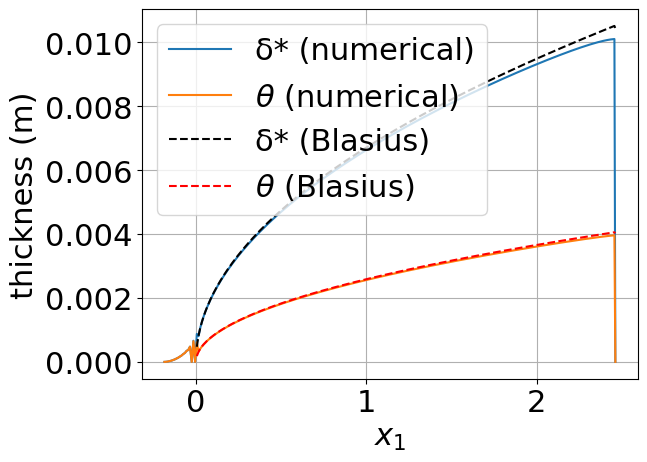

In [6]:
ni, nj = v1_2d.shape
# Creating empty arrays to store results
delta_star = np.zeros(ni)
theta = np.zeros(ni)

delta_star_blasius = np.zeros(ni)
theta_blasius = np.zeros(ni)

x1 = x1_2d[:,0]

for i in range(ni):
    # local x2 array 
    x2 = x2_2d[i, :]

    # local velocity profile
    u = v1_2d[i, :].copy()

    # local freestream velocity (could also use constant V1_inf = 1.0)
    Vinf = np.max(v1_2d[i,:])
    if Vinf == 0:
        # avoid division by zero, skipping or setting to NaN
        delta_star[i] = np.nan
        theta[i] = np.nan
        continue


    # normalized velocity
    uhat = v1_2d[i,:] / Vinf

    # finding index of maximum u
    jmax = np.argmax(u)  # returns first index of maximum
    

    # integration domain up to jmax (include jmax)
    x2_int = x2[:jmax+1]
    uhat_int = uhat[:jmax+1]

    # integrands
    integrand_delta = 1.0 - uhat_int
    integrand_theta = uhat_int * (1.0 - uhat_int)

    # trapezoidal integration
    delta_star[i] = np.trapz(integrand_delta, x2_int)
    theta[i]      = np.trapz(integrand_theta, x2_int)

    delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
    theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


    #delta_star_blasius[i] = np.trapz(1.7208 * np.sqrt((viscos * xc[i]) / Vinf, x2_int))
    #theta_blasius[i] = np.trapz(0.664 * np.sqrt((viscos * xc[]) / Vinf, x2_int))

# Plotting
plt.figure()
plt.plot(x1[1:], delta_star[1:], label="δ* (numerical)")
plt.plot(x1[1:], theta[1:], label=r'$\theta$ (numerical)')
plt.plot(x1, delta_star_blasius, 'k--', label="δ* (Blasius)")
plt.plot(x1, theta_blasius, 'r--', label=r'$\theta$ (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('thickness (m)')
plt.legend()
plt.grid(True)
plt.show()

#display(delta_star, theta)

## E3

Text(0.5, 0, '$\\partial V_1 / \\partial x_2$')

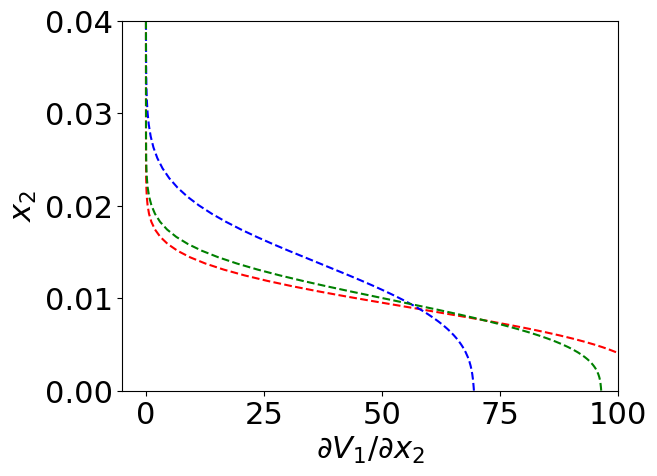

In [14]:
i = 85
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.figure()
plt.plot(gradient, x2_2d[i,:], 'r--')
i = 170
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.plot(gradient, x2_2d[i,:], 'b--')
i = 100
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.axis([-5,100,0,0.04])
plt.plot(gradient, x2_2d[i,:], 'g--')
plt.ylabel('$x_2$')
plt.xlabel('$\\partial V_1 / \\partial x_2$')

## E4

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_3636/324503190.py:16: RuntimeWarning: invalid value encountered in sqrt
  Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_3636/324503190.py:19: RuntimeWarning: invalid value encountered in sqrt
  valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values


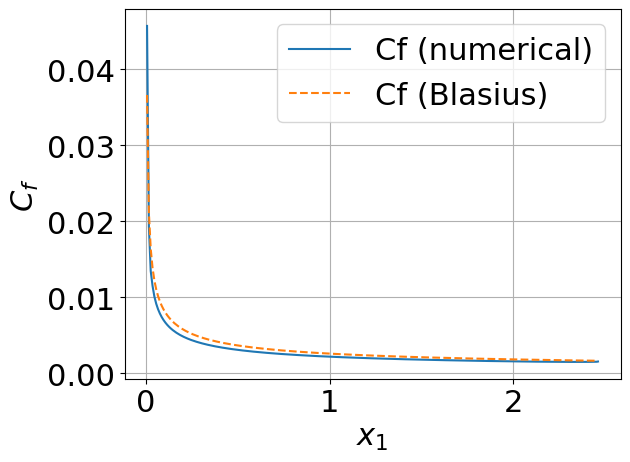

In [8]:

rho = 1.204             # kg/m^3 at 20C

dvdx = np.gradient(v2_2d, xp, axis=0)  # ∂v2/∂x1

tau12 = viscos * (dudy + dvdx)   # shape (ni, nj) as denoted in boundary_layer.py

# extract wall shear stress at the wall index j=0
tau_w = tau12[:,0]          

Vinf = 1 # freestream velocity (assumed constant according to problem statement)

# local skin friction coefficient
Cf = tau_w / (0.5 * rho * Vinf**2)

# Blasius solution for Cf
Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)

# Plotting results
valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values
plt.figure()
plt.plot(xp[valid], Cf[valid], label='Cf (numerical)')
plt.plot(xp[valid], Cf_blas[valid], '--', label='Cf (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('$C_f$')
plt.legend()
plt.grid(True)
plt.show()

## E5

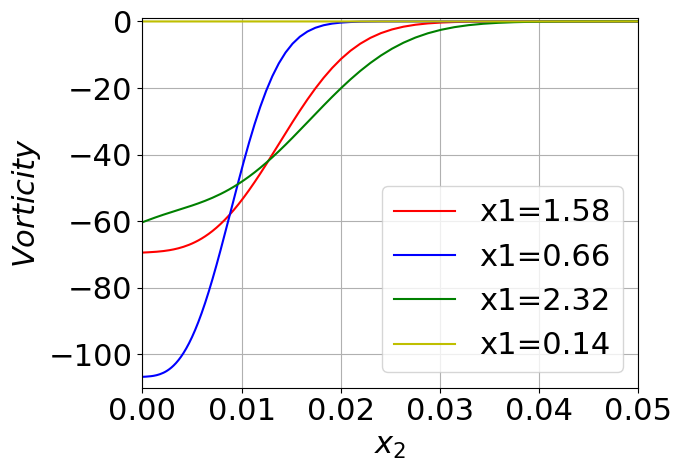

In [27]:
import numpy as np
import matplotlib.pyplot as plt

i = 170

dvdxe5 = np.gradient(v2_2d, xp, axis=0) 
dudye5 = np.gradient(v1_2d, yp, axis=1)
vorticity = (dvdx - dudy)


plt.figure()
plt.plot(yp, vorticity[i,:], 'r-', label='x1=1.58')


i = 85

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)


plt.plot(yp, vorticity[i,:], 'b-', label='x1=0.66')

i = 250

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'g-', label='x1=2.32')

i = 5

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'y-', label='x1=0.14')
plt.axis([0,0.05,-110,1])
plt.xlabel('$x_2$')
plt.ylabel('$Vorticity$')
plt.legend()
plt.grid(True)
plt.show()

## E6

[[ 1.00000000e+04  6.71268904e+03  4.04296700e-05 ...  7.53144300e-05
  -5.41234292e+01 -8.11852031e+01]
 [-6.66666667e-19  1.75192534e-05  3.31335300e-05 ...  6.46841983e-05
   3.33749600e-05 -6.66666667e-19]
 [ 0.00000000e+00  1.20348373e-05  2.28788325e-05 ...  4.38959175e-05
   2.06224775e-05  0.00000000e+00]
 ...
 [ 3.00191563e+01  3.00028988e+01  2.99444839e+01 ... -8.50922920e-05
  -2.22852429e-05  0.00000000e+00]
 [ 3.01512017e+01  3.01326196e+01  3.00658820e+01 ... -9.07323151e-05
  -1.71918035e-05  6.06060606e-19]
 [ 3.06793000e+01  3.06603922e+01  3.05924823e+01 ... -8.11852031e-05
  -5.43631410e+01 -8.15446911e+01]]
[[ 1.00000000e+04  6.71268900e+03 -4.04296700e-05 ... -7.53144300e-05
  -5.41235082e+01 -8.11852031e+01]
 [ 6.66666667e-19 -1.75192566e-05 -3.31335300e-05 ... -6.46841983e-05
  -3.33749600e-05  6.66666667e-19]
 [ 0.00000000e+00 -1.20348377e-05 -2.28788325e-05 ... -4.38959175e-05
  -2.06224775e-05  0.00000000e+00]
 ...
 [ 3.00191563e+01  3.00028986e+01  2.9944477

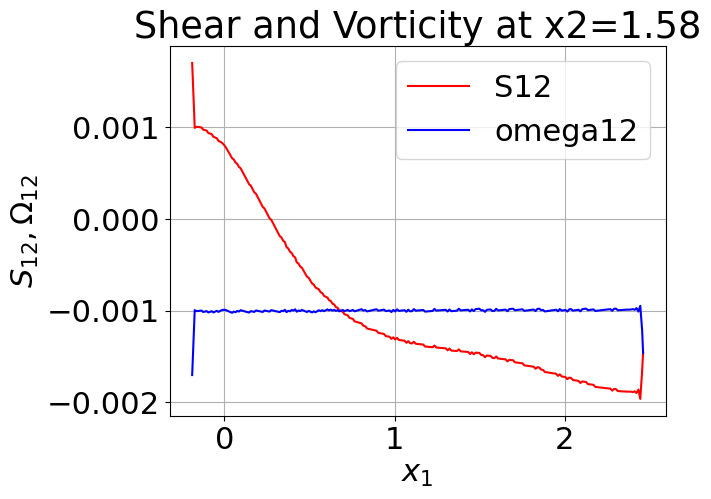

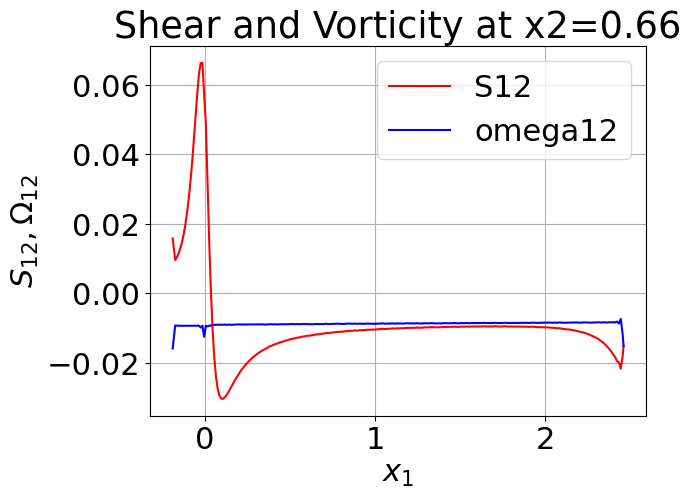

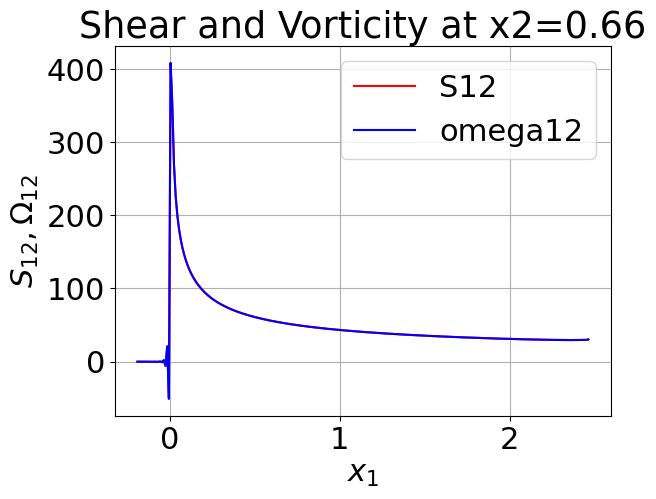

In [ ]:
S12 = 0.5 * (dudy + dvdx)
omega12 = 0.5 * (dudy - dvdx)

print(S12)
print(omega12)

i = 170

plt.figure()
plt.plot(xp, S12[:,i], 'r-', label='S12')
plt.plot(xp, omega12[:,i], 'b-', label='omega12')
plt.title('Shear and Vorticity at x2=1.58')
plt.xlabel('$x_1$')
plt.ylabel('$S_{12}, \\Omega_{12}$')
plt.legend()
plt.grid(True)
plt.show()

i = 85

plt.figure()
plt.plot(xp, S12[:,i], 'r-', label='S12')
plt.plot(xp, omega12[:,i], 'b-', label='omega12')
plt.title('Shear and Vorticity at x2=0.66')
plt.xlabel('$x_1$')
plt.ylabel('$S_{12}, \\Omega_{12}$')
plt.legend()
plt.grid(True)
plt.show()

i = 5

plt.figure()
plt.plot(xp, S12[:,i], 'r-', label='S12')
plt.plot(xp, omega12[:,i], 'b-', label='omega12')
plt.title('Shear and Vorticity at x2=0.66')
plt.xlabel('$x_1$')
plt.ylabel('$S_{12}, \\Omega_{12}$')
plt.legend()
plt.grid(True)
plt.show()

# X2 (y) value is incorrect, need to be calculated based on given height and amount of elements.

# Change axels, meaning x on y axis, and then plot for x1 coordinates, meaning x1=i for example.





## E7

Look at equation (2.10) for tau formulation